<a href="https://colab.research.google.com/github/WestonMadeira1/HW_2/blob/main/HW2(1a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
file_path = '/content/drive/My Drive/ML Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [244]:
housing.shape

(545, 13)

In [245]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [246]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [247]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [248]:
varlist_1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']
df_train = df_train[varlist_1]
df_train.head

<bound method NDFrame.head of        price  area  bedrooms  bathrooms  stories  parking
22   8645000  8050         3          1        1        1
41   7840000  6360         3          2        4        0
91   6419000  6750         2          1        1        2
118  5950000  6420         3          1        1        0
472  3010000  3630         4          1        2        3
..       ...   ...       ...        ...      ...      ...
526  2310000  3180         2          1        1        0
53   7350000  5150         3          2        4        2
350  3780000  3420         2          1        2        1
79   6650000  6000         3          2        3        0
520  2450000  7700         2          1        1        0

[436 rows x 6 columns]>

In [249]:
df_test = df_test[varlist_1]
df_test.head

<bound method NDFrame.head of        price   area  bedrooms  bathrooms  stories  parking
265  4403000   2880         3          1        2        0
54   7350000   6000         3          2        2        1
171  5250000  10269         3          1        1        1
244  4550000   5320         3          1        2        0
268  4382000   4950         4          1        2        0
..       ...    ...       ...        ...      ...      ...
451  3150000   6750         2          1        1        0
320  4060000   4320         3          1        2        2
424  3360000   3100         3          1        2        0
338  3885000   3780         2          1        2        0
373  3640000   3000         2          1        2        0

[109 rows x 6 columns]>

In [250]:
X_1 = df_train.values[:,1]
X_2 = df_train.values[:,2]
X_3 = df_train.values[:,3]
X_4 = df_train.values[:,4]
X_5 = df_train.values[:,5]

Y_T = df_train.values[:,0]

T_1 = df_test.values[:,1]
T_2 = df_test.values[:,2]
T_3 = df_test.values[:,3]
T_4 = df_test.values[:,4]
T_5 = df_test.values[:,5]

Y_V = df_test.values[:,0]

m = len(Y_T)
n = len(Y_V)

print('X1 = ', X_1[:5])
print('X2 = ', X_2[:5])
print('X3 = ', X_3[:5])
print('X4 = ', X_4[:5])
print('X5 = ', X_5[:5])
print('Y Train = ', Y_T[:5])
print('m = ', m)
print('n = ', n)

X1 =  [8050 6360 6750 6420 3630]
X2 =  [3 3 2 3 4]
X3 =  [1 2 1 1 1]
X4 =  [1 4 1 1 2]
X5 =  [1 0 2 0 3]
Y Train =  [8645000 7840000 6419000 5950000 3010000]
m =  436
n =  109


In [251]:
X1 = X_1.reshape(m, 1)
print(X1[:10])
X2 = X_2.reshape(m, 1)
print(X2[:10])
X3 = X_3.reshape(m, 1)
print(X3[:10])
X4 = X_4.reshape(m, 1)
print(X4[:10])
X5 = X_5.reshape(m, 1)
print(X5[:10])


T1 = T_1.reshape(n,1)
T2 = T_2.reshape(n,1)
T3 = T_3.reshape(n,1)
T4 = T_4.reshape(n,1)
T5 = T_5.reshape(n,1)



X0 = np.ones((m, 1))
X0[:5]
T0 = np.ones((n,1))

[[8050]
 [6360]
 [6750]
 [6420]
 [3630]
 [3850]
 [8960]
 [8250]
 [3000]
 [4032]]
[[3]
 [3]
 [2]
 [3]
 [4]
 [2]
 [4]
 [3]
 [3]
 [2]]
[[1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [4]
 [1]
 [2]
 [1]]
[[1]
 [4]
 [1]
 [1]
 [2]
 [1]
 [4]
 [1]
 [2]
 [1]]
[[1]
 [0]
 [2]
 [0]
 [3]
 [0]
 [3]
 [0]
 [0]
 [0]]


In [252]:
X_T = np.hstack((X0, X1, X2, X3, X4, X5,))
print(X_T[:10])
X_V = np.hstack((T0, T1, T2, T3, T4, T5,))

[[1.000e+00 8.050e+03 3.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 6.360e+03 3.000e+00 2.000e+00 4.000e+00 0.000e+00]
 [1.000e+00 6.750e+03 2.000e+00 1.000e+00 1.000e+00 2.000e+00]
 [1.000e+00 6.420e+03 3.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 3.630e+03 4.000e+00 1.000e+00 2.000e+00 3.000e+00]
 [1.000e+00 3.850e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 8.960e+03 4.000e+00 4.000e+00 4.000e+00 3.000e+00]
 [1.000e+00 8.250e+03 3.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 3.000e+03 3.000e+00 2.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.032e+03 2.000e+00 1.000e+00 1.000e+00 0.000e+00]]


In [253]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [254]:
def compute_cost(X,Y,theta):
   predictions = X.dot(theta)
   errors = np.subtract(predictions, Y)
   sqrErrors = np.square(errors)
   J = 1 / (2 * m) * np.sum(sqrErrors)
   return J

In [255]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        #cost_history[i] = compute_cost(X, Y, theta)
        loss = np.mean(np.square(errors))
        loss_history.append(loss)

    return theta, loss_history

In [256]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1100
alpha = 0.1

In [257]:
theta_t, loss_history_t = gradient_descent(X_T, Y_T, theta, alpha, iterations)
print('Final value of theta for training =', theta_t)

Final value of theta for training = [nan nan nan nan nan nan]


<ipython-input-255-e985a8fdb612>:11: RuntimeWarning: overflow encountered in square
  loss = np.mean(np.square(errors))
<ipython-input-255-e985a8fdb612>:9: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


In [258]:
theta_v, loss_history_v = gradient_descent(X_V, Y_V, theta, alpha, iterations)
print('Final value of theta for validation =', theta_v)

Final value of theta for validation = [nan nan nan nan nan nan]


<ipython-input-255-e985a8fdb612>:11: RuntimeWarning: overflow encountered in square
  loss = np.mean(np.square(errors))
<ipython-input-255-e985a8fdb612>:9: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


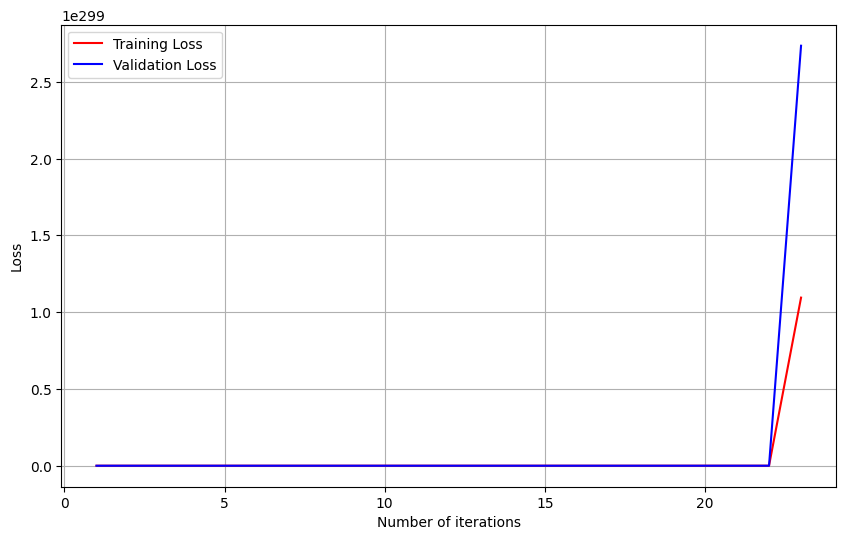

In [259]:
plt.plot(range(1, iterations + 1), loss_history_t, color='red', label='Training Loss')
plt.plot(range(1, iterations + 1),loss_history_v, color='blue', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.legend()
#plt.title('Convergence of gradient descent')

# Show the plot
plt.show()